In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import catboost as cb


#Model Evaluation
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

In [3]:
X_train = pd.read_csv("data/X_RandomUnderSampler_train.csv")
y_train = pd.read_csv("data/y_RandomUnderSampler_train.csv")
X_test = pd.read_csv("data/X_RandomUnderSampler_test.csv")
y_test = pd.read_csv("data/y_RandomUnderSampler_test.csv")


In [4]:
X_train.drop(labels="Unnamed: 0",axis=1,inplace = True)
y_train.drop(labels="Unnamed: 0",axis=1,inplace = True)
X_test.drop(labels="Unnamed: 0",axis=1,inplace = True)
y_test.drop(labels="Unnamed: 0",axis=1,inplace = True)

In [5]:
X_train

,0,1,2,3,4,5,0.1,1.1,2.1,3.1,...,76,77,78,79,80,81,82,83,84,85
0,-0.042936,-0.190506,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.763647,0.966343,1.134777,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.142822,0.234581,-0.031815,-0.145975,-0.216743,-1.655530,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.482890,0.519959,-0.420679,0.554906,-0.216743,0.369303,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.629542,-0.061550,1.134777,-0.145975,-0.216743,0.774269,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,-0.189587,0.910277,1.134777,-0.145975,-0.216743,-0.035664,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10500,1.863534,-0.106341,-1.587271,-0.145975,-0.216743,1.260229,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10501,-0.996171,-1.112624,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10502,-0.482890,-0.565970,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
y_train

,income
0,0
1,1
2,0
3,1
4,1
...,...
10499,0
10500,1
10501,0
10502,0


In [7]:
targets = ["0" , "1"]

In [8]:
def plot_roc_and_pr_curve(model_name, model, X_test, y_test, y_pred):
    try:
        # Create RocCurveDisplay
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

        # Create PrecisionRecallDisplay
        pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)

        # Combining the display objects into a single plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        roc_display.plot(ax=ax1)
        pr_display.plot(ax=ax2)
        
        # Save the plot with a descriptive file name and the desired format (e.g., PNG)
        plt.savefig(f"plots/{model_name}_roc_and_pr.png")
        
        plt.show()
    except Exception as e:
        print(e)


In [9]:
# creating logging for tracking model performance
def logging(Model_name,Time,training_accuracy_score,Classification_report,Confusion_matirx):
    data  = f'''\n"ModelName" : {Model_name},
               "TrainingTime" : {Time},
               "Training Accuracy" : {training_accuracy_score},
               "ConfusionMatrics" : {Confusion_matirx},
               "ClassificationReport" : {Classification_report}\n'''
               
    with open("logs/report.txt","a+") as f:
        f.write(data)


In [10]:
def model_evaluation(ModelName,training_time, model,X_train,y_train, y_test, y_pred, X_test):
    # Calculate accuracy
    training_accuracy_score = model.score(X_train,y_train)
    print("Training Accuracy :",training_accuracy_score)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)
    
    #Printing classification report
    cr = classification_report(y_test, y_pred,target_names=targets,output_dict=False)    
    print(f"\nClassification Report:\n{cr}")
    cr = classification_report(y_test, y_pred,target_names=targets,output_dict=True)

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion matirx :\n{cm}")
    
    try:
        y_pred_probs = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test,y_pred_probs[:, 1])
        print("\nAUC-ROC Score:", auc_roc)
    except Exception as e:
        print(e)
    
    print("\nPlotting Graphs\n")
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=targets)
    display.plot(include_values=True, cmap='Blues', ax=plt.gca())

    plot_roc_and_pr_curve("LogisticRegression",model,X_test,y_test,y_pred)
    
    logging(ModelName,training_accuracy_score,training_time,cr,cm)
    
    json_data = {"ModelName": ModelName,
                 "Training accuracy":training_accuracy_score,
                 "ClassificationReport": cr}
    json_file_path = "logs/json_data.json"
    with open(json_file_path, 'a+') as json_file:
        json.dump(json_data, json_file, indent=4)
     

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
Training time: 5.70 seconds
Training Accuracy : 0.8184501142421935

Accuracy: 0.8299188248936993

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2583
           1       0.81      0.86      0.83      2591

    accuracy                           0.83      5174
   macro avg       0.83      0.83      0.83      5174
weighted avg       0.83      0.83      0.83      5174


Confusion matirx :
[[2072  511]
 [ 369 2222]]

AUC-ROC Score: 0.9117946469755264

Plotting Graphs



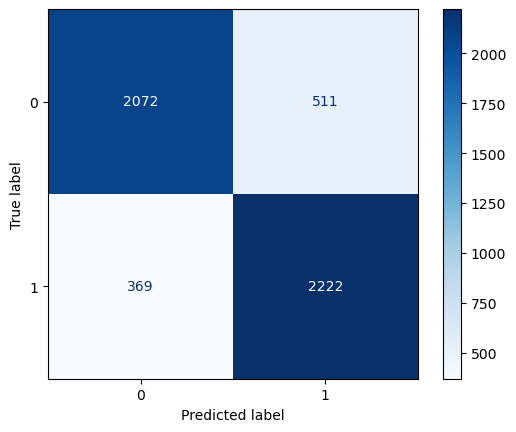

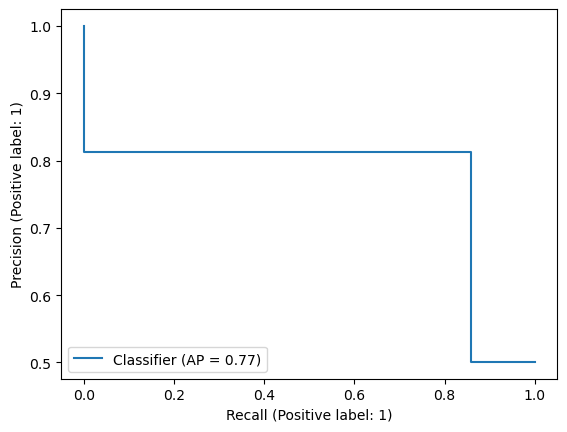

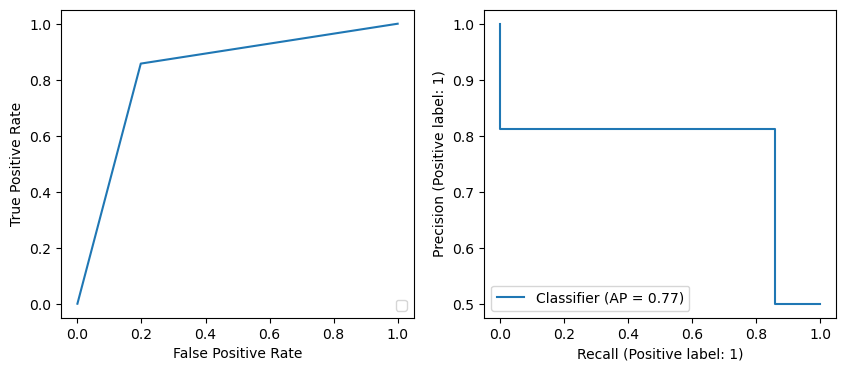

------------------------------


In [11]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

start_time = time.time()
# Create the LogisticRegression classifier
model = LogisticRegression()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

model_evaluation("LogisticRegression", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 6.58 seconds
Training Accuracy : 0.7898895658796649

Accuracy: 0.7960958639350599

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      2583
           1       0.76      0.87      0.81      2591

    accuracy                           0.80      5174
   macro avg       0.80      0.80      0.80      5174
weighted avg       0.80      0.80      0.80      5174


Confusion matirx :
[[1872  711]
 [ 344 2247]]

AUC-ROC Score: 0.8932244541059294

Plotting Graphs



C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


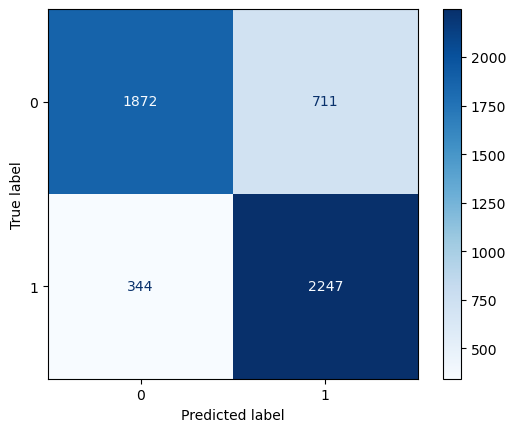

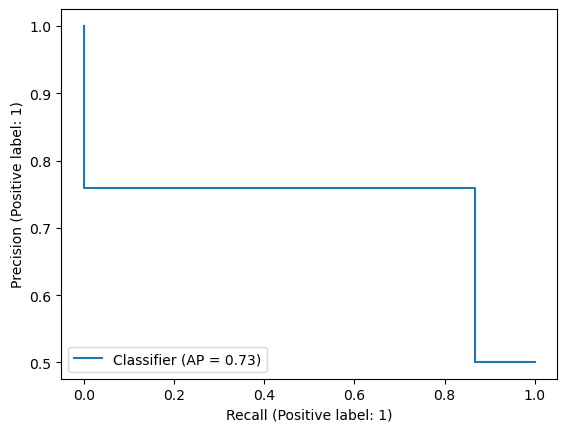

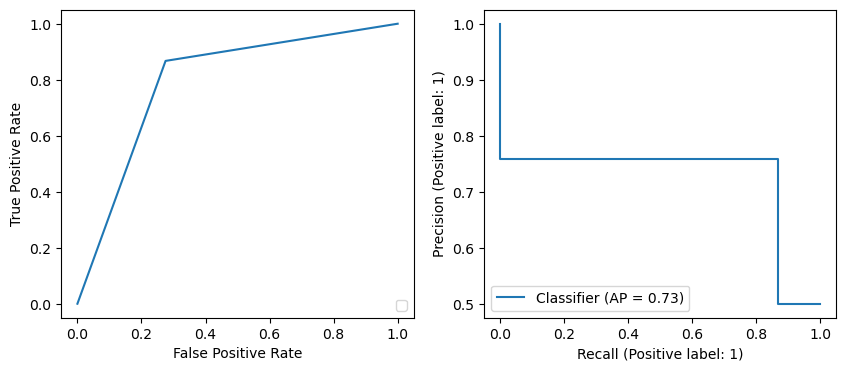

------------------------------


In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=None, var_smoothing=0.05).fit(X_train,y_train)

# Train the ensemble model
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("GaussianNB", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 7.62 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training Accuracy : 0.9999047981721249

Accuracy: 0.7773482798608427

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2583
           1       0.78      0.77      0.78      2591

    accuracy                           0.78      5174
   macro avg       0.78      0.78      0.78      5174
weighted avg       0.78      0.78      0.78      5174


Confusion matirx :
[[2026  557]
 [ 595 1996]]

AUC-ROC Score: 0.7775104657370663

Plotting Graphs



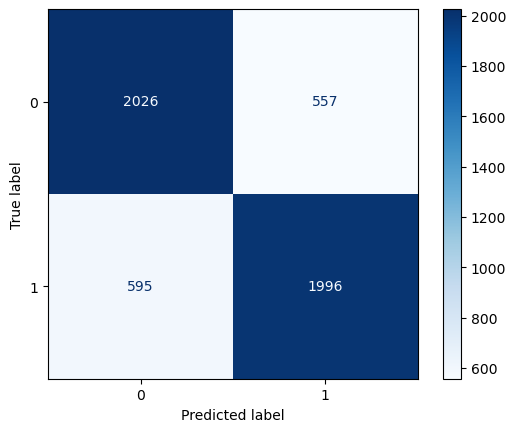

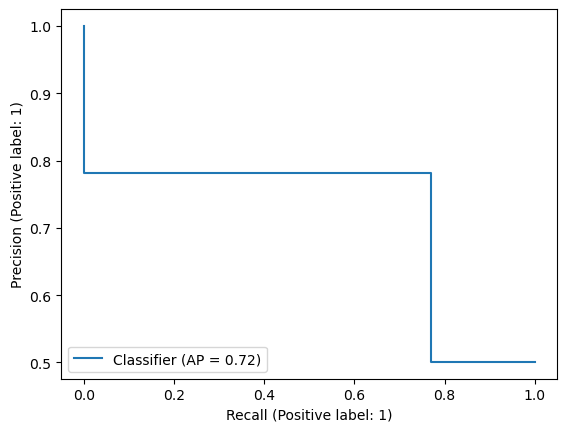

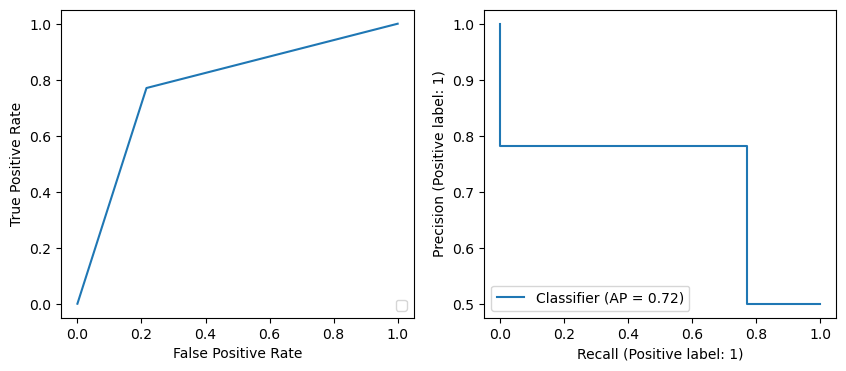

------------------------------


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("DecisionTreeClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 59.33 seconds
{'max_depth': 20, 'n_estimators': 300}
RandomForestClassifier(max_depth=20, n_estimators=300)
Training Accuracy : 0.9324067022086824

Accuracy: 0.837843061461152

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2583
           1       0.81      0.88      0.84      2591

    accuracy                           0.84      5174
   macro avg       0.84      0.84      0.84      5174
weighted avg       0.84      0.84      0.84      5174


Confusion matirx :
[[2050  533]
 [ 306 2285]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9212857933287939

Plotting Graphs



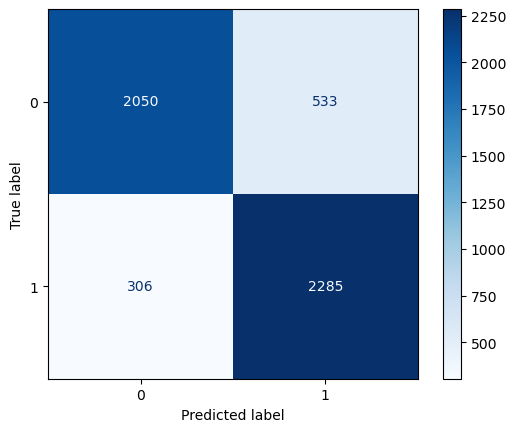

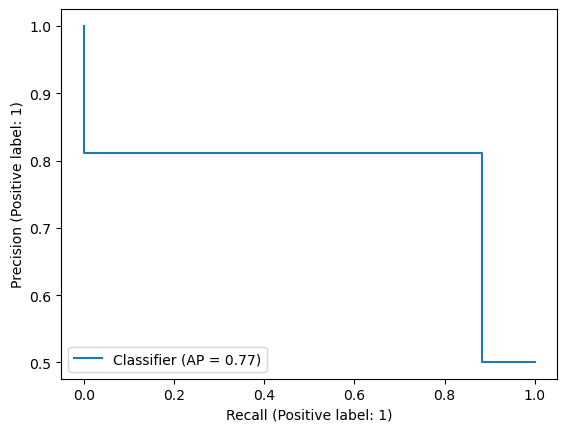

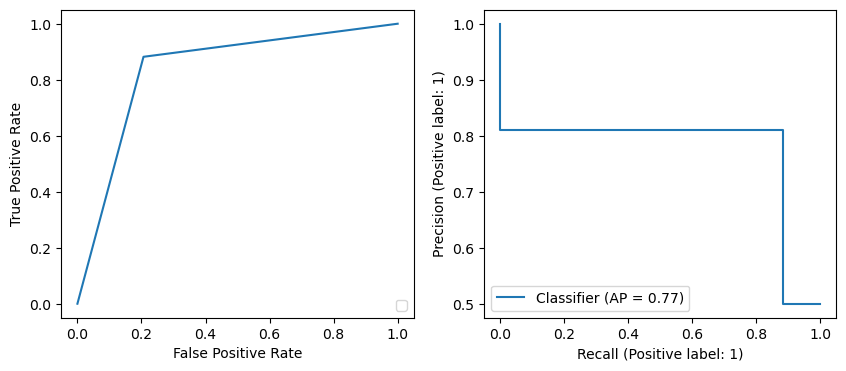

------------------------------


In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

start_time = time.time()
# Create the RandomForestClassifier
model = RandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("RandomForestClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 102.98 seconds
{'C': 1, 'kernel': 'rbf'}
SVC(C=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training Accuracy : 0.839013709063214

Accuracy: 0.8291457286432161

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2583
           1       0.81      0.86      0.84      2591

    accuracy                           0.83      5174
   macro avg       0.83      0.83      0.83      5174
weighted avg       0.83      0.83      0.83      5174


Confusion matirx :
[[2049  534]
 [ 350 2241]]
predict_proba is not available when  probability=False

Plotting Graphs



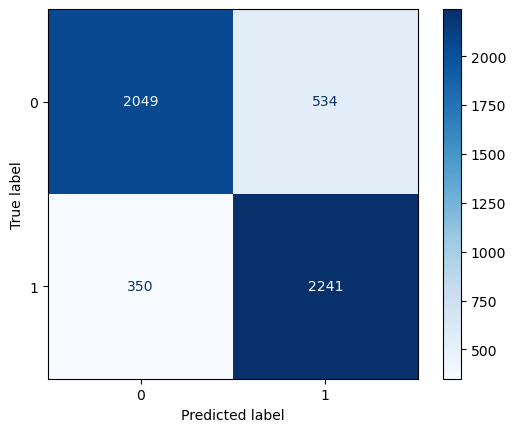

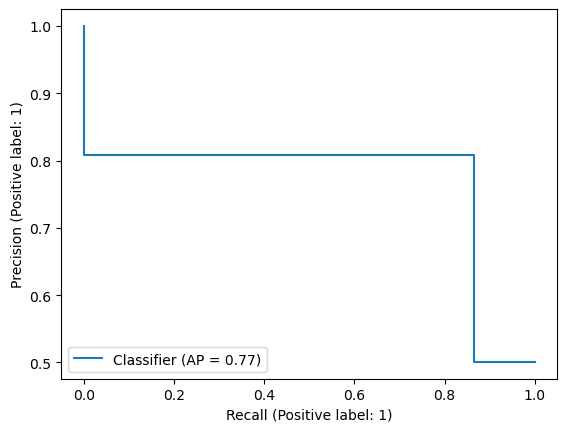

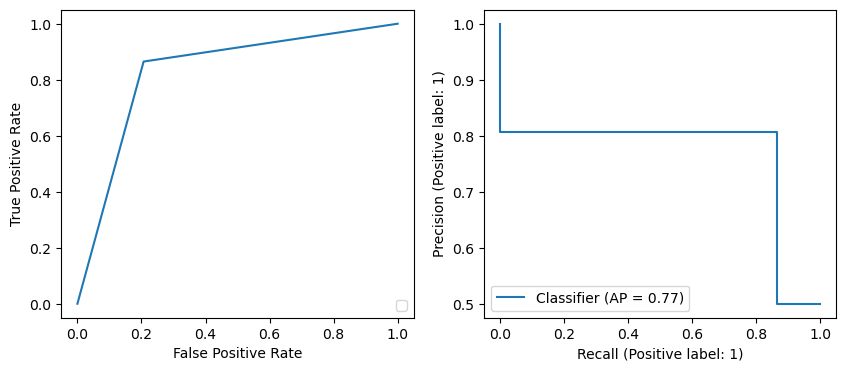

------------------------------


In [15]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

start_time = time.time()
# Create the SVC classifier
model = SVC()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("SVC", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training time: 68.09 seconds
{'learning_rate': 0.2, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.2)
Training Accuracy : 0.8535795887281036

Accuracy: 0.843448009277155

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2583
           1       0.83      0.87      0.85      2591

    accuracy                           0.84      5174
   macro avg       0.84      0.84      0.84      5174
weighted avg       0.84      0.84      0.84      5174


Confusion matirx :
[[2115  468]
 [ 342 2249]]

AUC-ROC Score: 0.9263289360577346

Plotting Graphs



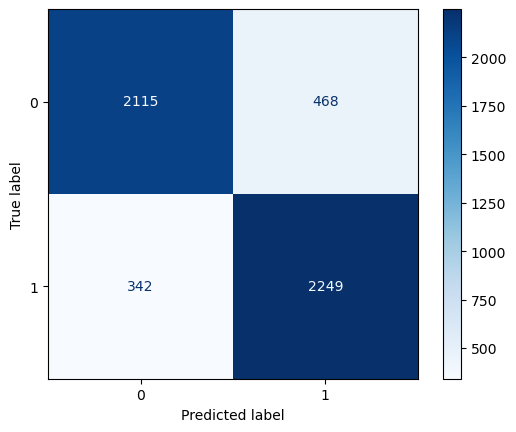

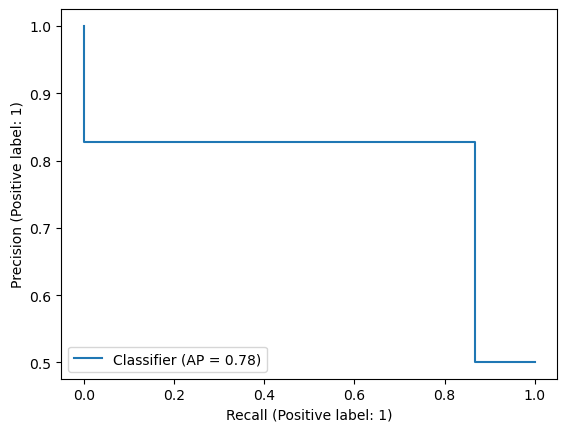

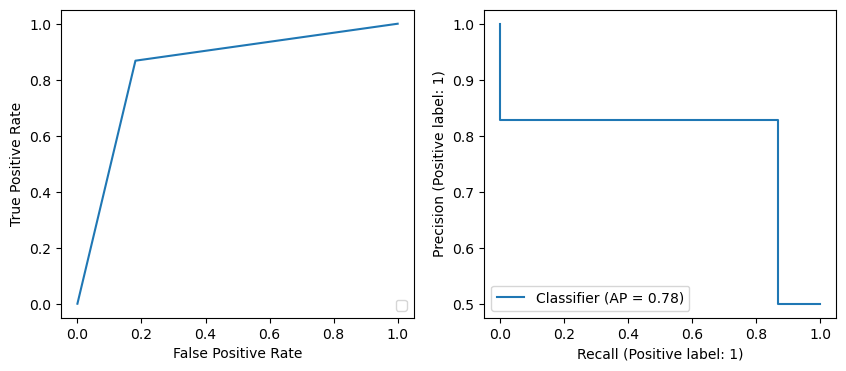

------------------------------


In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the GradientBoostingClassifier
model = GradientBoostingClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("GradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 92.95 seconds
{'learning_rate': 0.1, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Training Accuracy : 0.8668126428027418

Accuracy: 0.8475067645921918

Classification Report:
              precision    recall  f1-score   support

           0       0.87     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


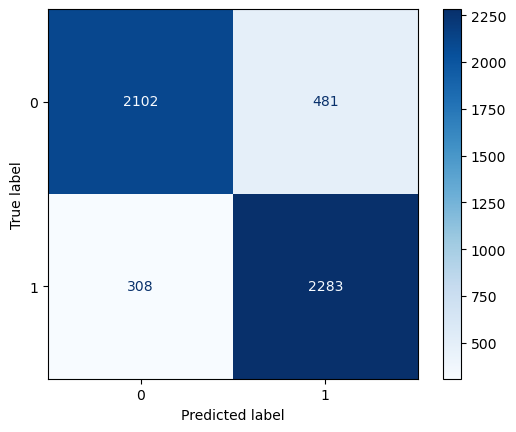

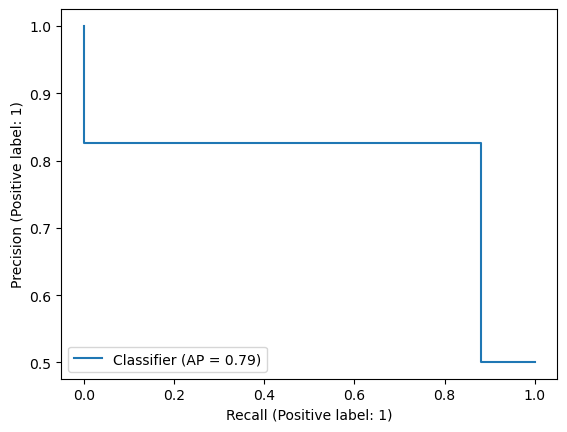

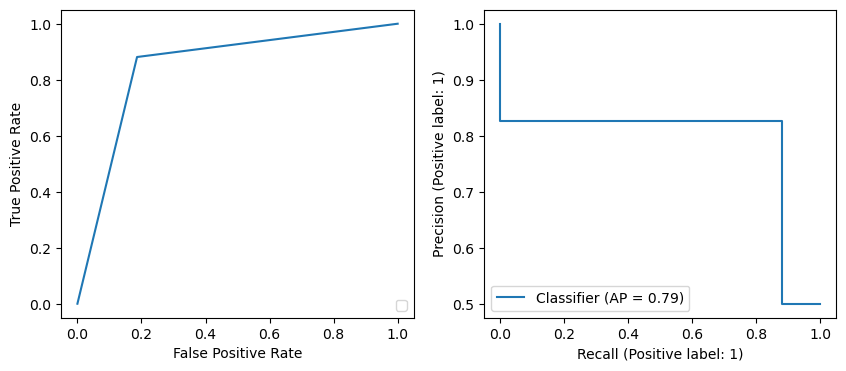

------------------------------


In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the XGBClassifier
model = XGBClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("XGBClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 33.93 seconds
{'learning_rate': 0.1, 'max_depth': 20}
HistGradientBoostingClassifier(max_depth=20)
Training Accuracy : 0.870049504950495

Accuracy: 0.844414379590259

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2583
           1       0.83      0.87      0.85      2591

    accuracy                           0.84      5174
   macro avg       0.85      0.84      0.84      5174
weighted avg       0.85      0.84      0.84      5174


Confusion matirx :
[[2114  469]
 [ 336 2255]]

AUC-ROC Score: 0.9265854898721011

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


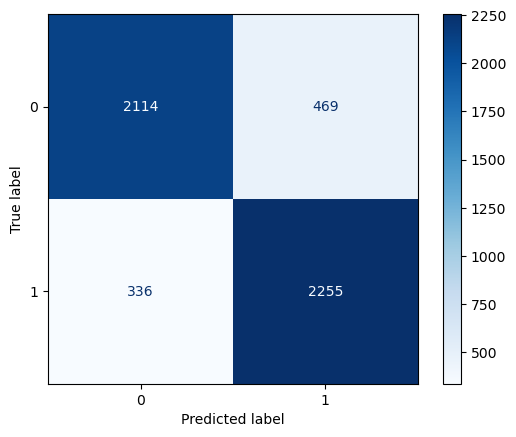

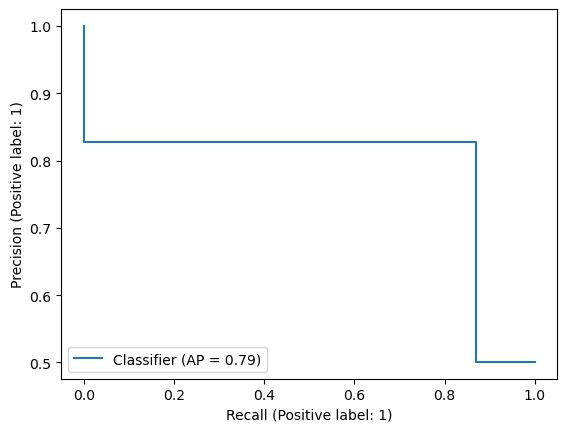

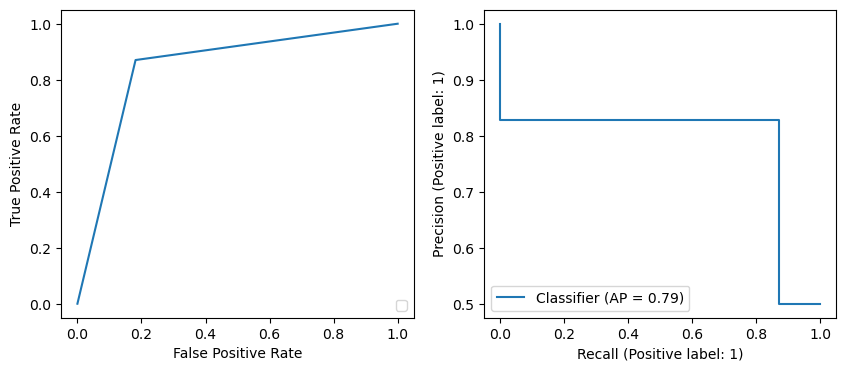

------------------------------


In [18]:
param_grid = {
    'max_depth': [None, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("HistGradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\RACHIT\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 83.22 seconds
{'max_depth': 20, 'n_estimators': 300}
BalancedRandomForestClassifier(max_depth=20, n_estimators=300)
Training Accuracy : 0.9323115003808073

Accuracy: 0.8374565133359103

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2583
           1       0.81      0.88      0.84      2591

    accuracy                           0.84      5174
   macro avg       0.84      0.84      0.84      5174
weighted avg       0.84      0.84      0.84      5174


Confusion matirx :
[[2054  529]
 [ 312 2279]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.921361474462735

Plotting Graphs



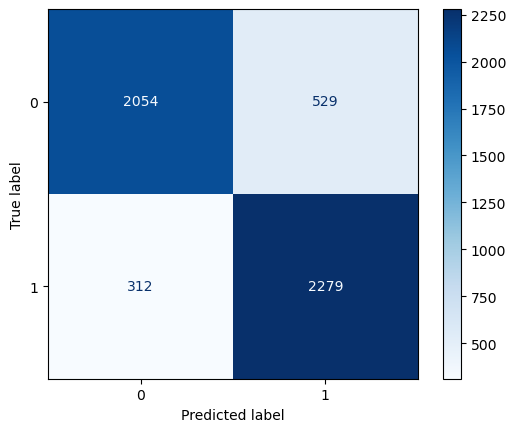

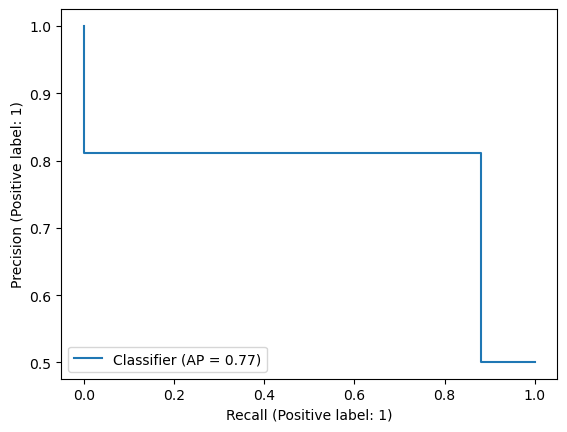

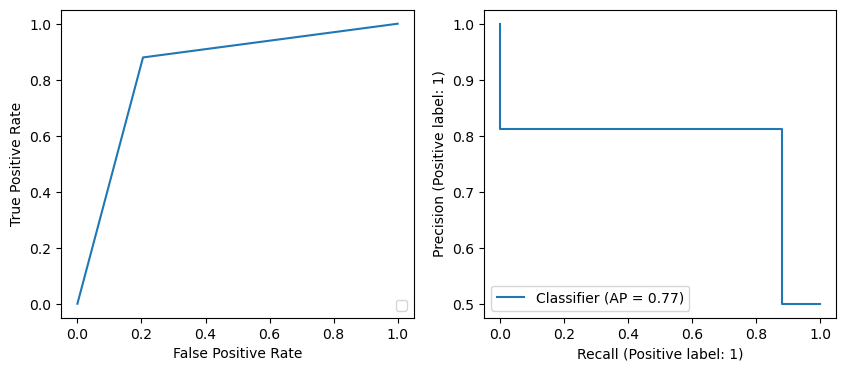

------------------------------


In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

start_time = time.time()
# Create the BalancedRandomForestClassifier
model = BalancedRandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("BalancedRandomForestClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 35.24 seconds
{'learning_rate': 0.2, 'n_estimators': 200}
AdaBoostClassifier(learning_rate=0.2, n_estimators=200)
Training Accuracy : 0.8281607006854531

Accuracy: 0.8337843061461152

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2583
           1       0.82      0.86      0.84      2591

    accuracy                           0.83      5174
   macro avg       0.83      0.83      0.83      5174
weighted avg       0.83      0.83      0.83      5174


Confusion matirx :
[[2094  489]
 [ 371 2220]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.918983906440487

Plotting Graphs



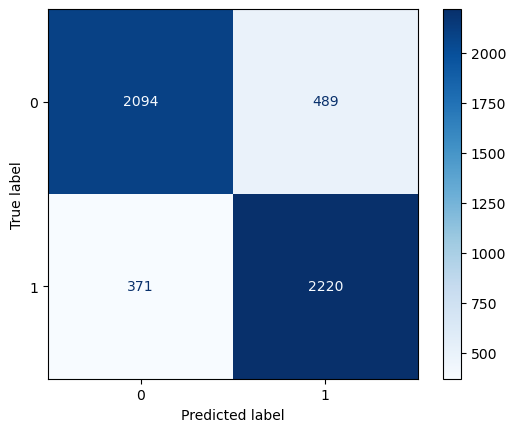

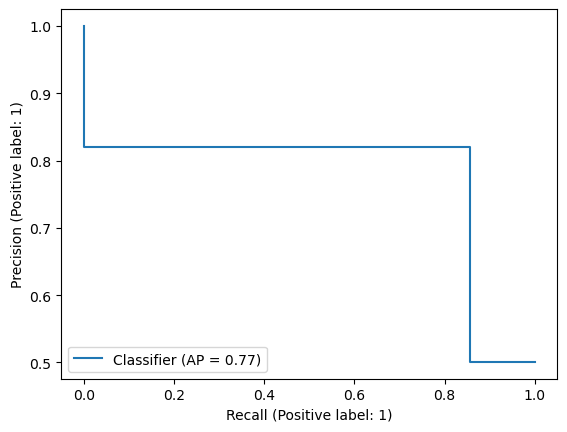

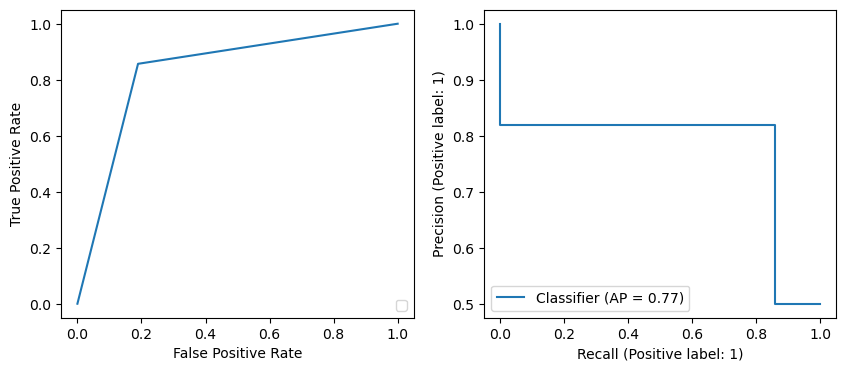

------------------------------


In [21]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the AdaBoostClassifier
model = AdaBoostClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("AdaBoostClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

0:	learn: 0.7816070	total: 139ms	remaining: 2m 19s
1:	learn: 0.8052171	total: 147ms	remaining: 1m 13s
2:	learn: 0.8033130	total: 155ms	remaining: 51.5s
3:	learn: 0.8075971	total: 162ms	remaining: 40.3s
4:	learn: 0.8084539	total: 169ms	remaining: 33.6s
5:	learn: 0.8074067	total: 176ms	remaining: 29.1s
6:	learn: 0.8081683	total: 183ms	remaining: 25.9s
7:	learn: 0.8087395	total: 189ms	remaining: 23.4s
8:	learn: 0.8127380	total: 196ms	remaining: 21.6s
9:	learn: 0.8127380	total: 203ms	remaining: 20.1s
10:	learn: 0.8151181	total: 210ms	remaining: 18.8s
11:	learn: 0.8160701	total: 216ms	remaining: 17.8s
12:	learn: 0.8158797	total: 223ms	remaining: 17s
13:	learn: 0.8166413	total: 230ms	remaining: 16.2s
14:	learn: 0.8171173	total: 238ms	remaining: 15.6s
15:	learn: 0.8188309	total: 244ms	remaining: 15s
16:	learn: 0.8177837	total: 251ms	remaining: 14.5s
17:	learn: 0.8178789	total: 258ms	remaining: 14.1s
18:	learn: 0.8194973	total: 265ms	remaining: 13.7s
19:	learn: 0.8201637	total: 272ms	remaining

184:	learn: 0.8482483	total: 1.56s	remaining: 6.9s
185:	learn: 0.8482483	total: 1.57s	remaining: 6.89s
186:	learn: 0.8481531	total: 1.58s	remaining: 6.87s
187:	learn: 0.8485339	total: 1.59s	remaining: 6.86s
188:	learn: 0.8483435	total: 1.6s	remaining: 6.85s
189:	learn: 0.8493907	total: 1.6s	remaining: 6.84s
190:	learn: 0.8487243	total: 1.61s	remaining: 6.83s
191:	learn: 0.8491051	total: 1.62s	remaining: 6.81s
192:	learn: 0.8487243	total: 1.63s	remaining: 6.8s
193:	learn: 0.8492003	total: 1.63s	remaining: 6.79s
194:	learn: 0.8490099	total: 1.64s	remaining: 6.77s
195:	learn: 0.8492955	total: 1.65s	remaining: 6.76s
196:	learn: 0.8491051	total: 1.66s	remaining: 6.75s
197:	learn: 0.8492003	total: 1.66s	remaining: 6.74s
198:	learn: 0.8491051	total: 1.67s	remaining: 6.72s
199:	learn: 0.8493907	total: 1.68s	remaining: 6.71s
200:	learn: 0.8493907	total: 1.69s	remaining: 6.7s
201:	learn: 0.8494859	total: 1.69s	remaining: 6.68s
202:	learn: 0.8495811	total: 1.7s	remaining: 6.67s
203:	learn: 0.8497

349:	learn: 0.8629094	total: 2.79s	remaining: 5.18s
350:	learn: 0.8629094	total: 2.8s	remaining: 5.18s
351:	learn: 0.8632902	total: 2.81s	remaining: 5.17s
352:	learn: 0.8635758	total: 2.82s	remaining: 5.16s
353:	learn: 0.8636710	total: 2.83s	remaining: 5.16s
354:	learn: 0.8637662	total: 2.83s	remaining: 5.15s
355:	learn: 0.8639566	total: 2.84s	remaining: 5.14s
356:	learn: 0.8638614	total: 2.85s	remaining: 5.13s
357:	learn: 0.8640518	total: 2.86s	remaining: 5.13s
358:	learn: 0.8639566	total: 2.87s	remaining: 5.12s
359:	learn: 0.8643374	total: 2.88s	remaining: 5.12s
360:	learn: 0.8641470	total: 2.88s	remaining: 5.11s
361:	learn: 0.8641470	total: 2.89s	remaining: 5.1s
362:	learn: 0.8645278	total: 2.9s	remaining: 5.09s
363:	learn: 0.8647182	total: 2.91s	remaining: 5.08s
364:	learn: 0.8645278	total: 2.92s	remaining: 5.07s
365:	learn: 0.8647182	total: 2.92s	remaining: 5.07s
366:	learn: 0.8645278	total: 2.93s	remaining: 5.06s
367:	learn: 0.8650038	total: 2.94s	remaining: 5.05s
368:	learn: 0.8

510:	learn: 0.8758568	total: 3.98s	remaining: 3.81s
511:	learn: 0.8758568	total: 3.99s	remaining: 3.8s
512:	learn: 0.8758568	total: 4s	remaining: 3.79s
513:	learn: 0.8763328	total: 4.01s	remaining: 3.79s
514:	learn: 0.8763328	total: 4.01s	remaining: 3.78s
515:	learn: 0.8763328	total: 4.02s	remaining: 3.77s
516:	learn: 0.8761424	total: 4.03s	remaining: 3.76s
517:	learn: 0.8761424	total: 4.04s	remaining: 3.75s
518:	learn: 0.8763328	total: 4.04s	remaining: 3.75s
519:	learn: 0.8765232	total: 4.05s	remaining: 3.74s
520:	learn: 0.8769992	total: 4.06s	remaining: 3.73s
521:	learn: 0.8771896	total: 4.06s	remaining: 3.72s
522:	learn: 0.8776657	total: 4.07s	remaining: 3.71s
523:	learn: 0.8774752	total: 4.08s	remaining: 3.7s
524:	learn: 0.8773800	total: 4.08s	remaining: 3.69s
525:	learn: 0.8778561	total: 4.09s	remaining: 3.69s
526:	learn: 0.8776657	total: 4.1s	remaining: 3.68s
527:	learn: 0.8780465	total: 4.11s	remaining: 3.67s
528:	learn: 0.8780465	total: 4.11s	remaining: 3.66s
529:	learn: 0.8780

677:	learn: 0.8868050	total: 5.18s	remaining: 2.46s
678:	learn: 0.8865194	total: 5.19s	remaining: 2.45s
679:	learn: 0.8869954	total: 5.2s	remaining: 2.44s
680:	learn: 0.8869002	total: 5.2s	remaining: 2.44s
681:	learn: 0.8868050	total: 5.21s	remaining: 2.43s
682:	learn: 0.8867098	total: 5.22s	remaining: 2.42s
683:	learn: 0.8871858	total: 5.23s	remaining: 2.42s
684:	learn: 0.8870906	total: 5.24s	remaining: 2.41s
685:	learn: 0.8875666	total: 5.24s	remaining: 2.4s
686:	learn: 0.8872810	total: 5.25s	remaining: 2.39s
687:	learn: 0.8875666	total: 5.26s	remaining: 2.38s
688:	learn: 0.8877570	total: 5.27s	remaining: 2.38s
689:	learn: 0.8875666	total: 5.27s	remaining: 2.37s
690:	learn: 0.8879474	total: 5.28s	remaining: 2.36s
691:	learn: 0.8878522	total: 5.29s	remaining: 2.35s
692:	learn: 0.8879474	total: 5.3s	remaining: 2.35s
693:	learn: 0.8876618	total: 5.3s	remaining: 2.34s
694:	learn: 0.8878522	total: 5.31s	remaining: 2.33s
695:	learn: 0.8881379	total: 5.32s	remaining: 2.32s
696:	learn: 0.888

859:	learn: 0.8968012	total: 6.61s	remaining: 1.08s
860:	learn: 0.8970868	total: 6.62s	remaining: 1.07s
861:	learn: 0.8971820	total: 6.63s	remaining: 1.06s
862:	learn: 0.8974676	total: 6.63s	remaining: 1.05s
863:	learn: 0.8971820	total: 6.64s	remaining: 1.04s
864:	learn: 0.8973724	total: 6.65s	remaining: 1.04s
865:	learn: 0.8970868	total: 6.66s	remaining: 1.03s
866:	learn: 0.8970868	total: 6.67s	remaining: 1.02s
867:	learn: 0.8969916	total: 6.67s	remaining: 1.01s
868:	learn: 0.8968964	total: 6.68s	remaining: 1.01s
869:	learn: 0.8970868	total: 6.69s	remaining: 999ms
870:	learn: 0.8970868	total: 6.7s	remaining: 992ms
871:	learn: 0.8972772	total: 6.7s	remaining: 984ms
872:	learn: 0.8969916	total: 6.71s	remaining: 976ms
873:	learn: 0.8973724	total: 6.72s	remaining: 969ms
874:	learn: 0.8971820	total: 6.73s	remaining: 961ms
875:	learn: 0.8976580	total: 6.74s	remaining: 954ms
876:	learn: 0.8979436	total: 6.74s	remaining: 946ms
877:	learn: 0.8976580	total: 6.75s	remaining: 938ms
878:	learn: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


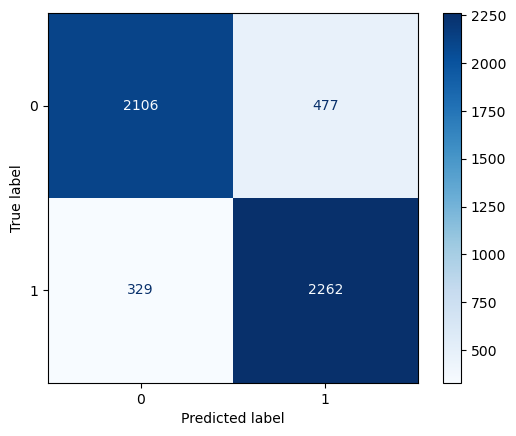

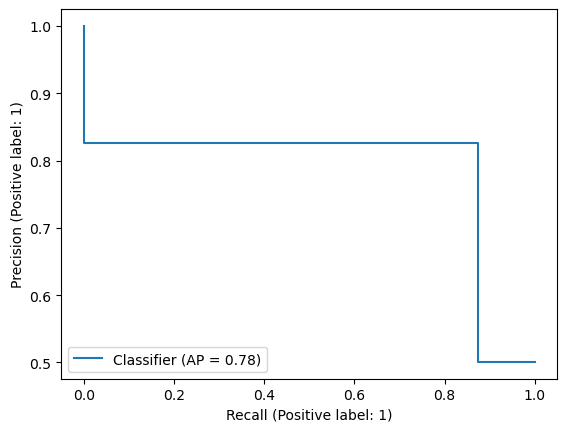

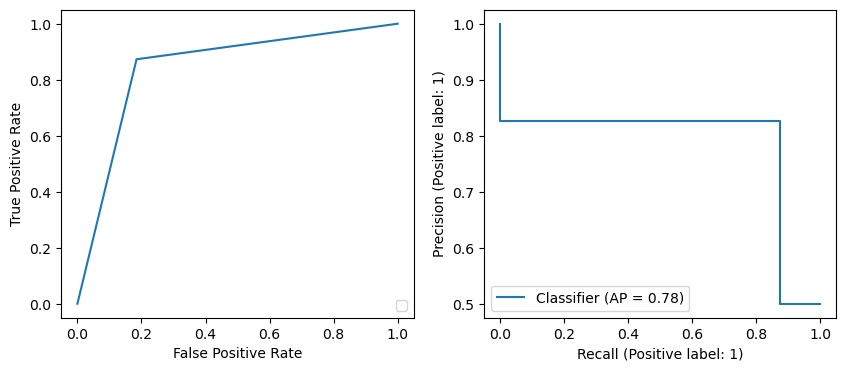

------------------------------


In [22]:
from sklearn.model_selection import train_test_split

start_time = time.time()
# Initialize the CatBoost classifier
model = cb.CatBoostClassifier(iterations=1000,  # Number of boosting iterations (trees)
                                       learning_rate=0.1,  # Learning rate (controls the step size during optimization)
                                       depth=6,  # Depth of the trees
                                       loss_function='MultiClass',  # For multi-class classification tasks
                                       eval_metric='Accuracy',  # Evaluation metric during training
                                       random_seed=42)  # Random seed for reproducibility

# Fit the model on the training data
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("CatBoostClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

[LightGBM] [Info] Number of positive: 5248, number of negative: 5256
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 10504, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499619 -> initscore=-0.001523
[LightGBM] [Info] Start training from score -0.001523


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training time: 0.22 seconds
Training Accuracy : 0.8613861386138614

Accuracy: 0.8459605720912253

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2583
           1       0.83      0.87      0.85      2591

    accuracy                           0.85      5174
   macro avg       0.85      0.85      0.85      5174
weighted avg       0.85      0.85      0.85      5174


Confusion matirx :
[[2115  468]
 [ 329 2262]]

AUC-ROC Score: 0.9269618783743663

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


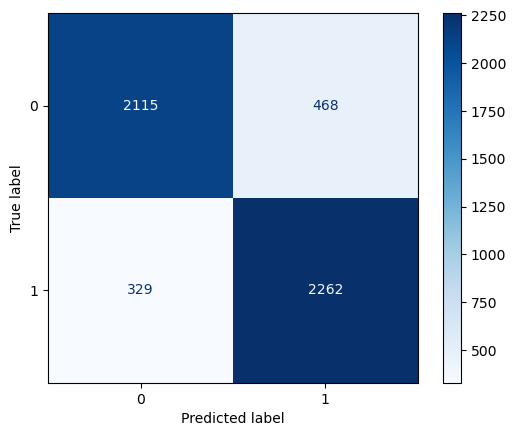

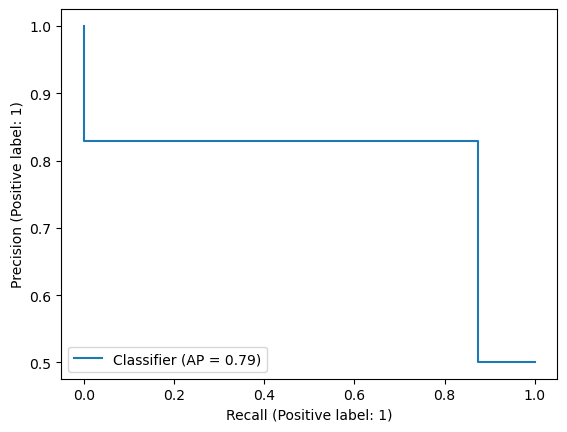

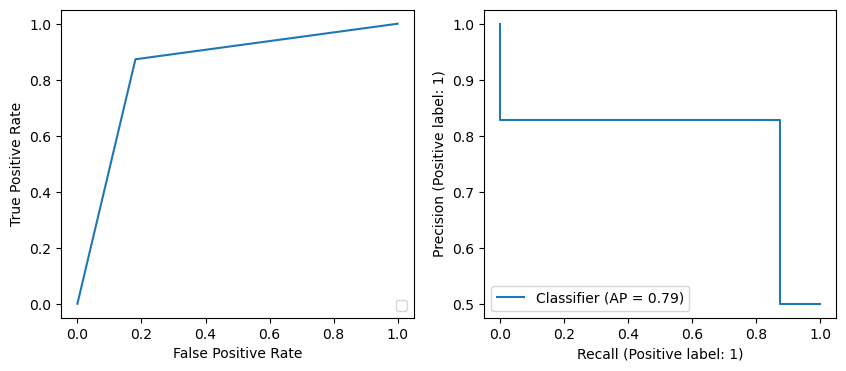

------------------------------


In [23]:
start_time = time.time()
# Assuming you have your features and labels in the variables X_train and y_train
model = lgb.LGBMClassifier(boosting_type='gbdt',  # 'gbdt' for gradient boosting decision trees
                                    num_leaves=31,  # Number of leaves in each decision tree
                                    learning_rate=0.05,  # Learning rate (controls the step size during optimization)
                                    n_estimators=100,  # Number of boosting iterations (trees)
                                    objective='binary',  # For multi-class classification tasks
                                    random_state=42)  # Random seed for reproducibility

# Fit the model on the training data
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("LGBMClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")